In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df_pcf = pd.read_excel('Final_PCF_Dataset_NN_Model.xlsx', sheet_name = 'Updated_Dataset')

In [3]:
df_pcf

,d_hole/pitch,pitch,n_silica,wavelength,guess Re(n_eff),in-plane wavelength,Re[n_eff (x)],Imag[n_eff (x)],Re[n_eff (y)],Imag[n_eff (y)],A_eff (in m^2),A_eff (in um^2),1st Order Derivative,2nd Order Derivative,Dispersion (in s/m^2),Dispersion (in ps/km-nm),Confinement Loss (x) (in dB/m),Confinement Loss (y) (in dB/m)
0,0.6,5.0,1.4701,0.4000,1.46,2.3252,1.4696,-5.120100e-17,1.4696,-5.067300e-17,2.328500e-11,23.285,-90189.873418,4.741773e+11,-3.793418e+04,-3.793418e+10,6.985743e-03,6.913704e-03
1,0.6,5.0,1.4646,0.4632,1.46,3.9935,1.4639,-8.895000e-17,1.4639,-8.908800e-17,2.340400e-11,23.404,-60221.870048,2.522674e+11,-2.337005e+04,-2.337005e+10,1.048025e-02,1.049651e-02
2,0.6,5.0,1.4610,0.5263,1.45,2.9411,1.4601,-1.557700e-16,1.4601,-1.549000e-16,2.352500e-11,23.525,-44303.797468,1.493434e+11,-1.571989e+04,-1.571989e+10,1.615268e-02,1.606247e-02
3,0.6,5.0,1.4584,0.5895,1.45,3.7715,1.4573,-2.531300e-16,1.4573,-2.537400e-16,2.364600e-11,23.646,-34865.293185,7.610146e+10,-8.972362e+03,-8.972362e+09,2.343441e-02,2.349088e-02
4,0.6,5.0,1.4565,0.6526,1.45,4.7479,1.4551,-4.098900e-16,1.4551,-4.162600e-16,2.376700e-11,23.767,-30063.291139,9.954906e+10,-1.299314e+04,-1.299314e+10,3.427792e-02,3.481062e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.4,4.0,1.4464,1.3474,1.44,9.9135,1.4403,-1.287100e-08,1.4403,-1.287200e-08,2.448600e-11,24.486,-20602.218700,-2.455911e+10,6.618190e+03,6.618190e+09,5.213266e+05,5.213671e+05
116,0.4,4.0,1.4457,1.4105,1.44,10.9979,1.4390,-1.698700e-08,1.4390,-1.698700e-08,2.472900e-11,24.729,-22151.898734,4.959598e+10,-1.399103e+04,-1.399103e+10,6.572609e+05,6.572609e+05
117,0.4,4.0,1.4449,1.4737,1.43,7.1204,1.4376,-2.238000e-08,1.4376,-2.238000e-08,2.498200e-11,24.982,-19017.432647,-7.475031e+10,2.203191e+04,2.203191e+10,8.287913e+05,8.287913e+05
118,0.4,4.0,1.4442,1.5368,1.43,7.6070,1.4364,-2.938100e-08,1.4364,-2.938100e-08,2.524500e-11,25.245,-23734.177215,1.456561e+13,-4.476886e+06,-4.476886e+12,1.043382e+06,1.043382e+06


In [5]:
df_pcf = df_pcf.drop(columns = ['guess Re(n_eff)','in-plane wavelength','Imag[n_eff (x)]','Imag[n_eff (y)]','Re[n_eff (y)]','A_eff (in m^2)','1st Order Derivative','2nd Order Derivative','Dispersion (in ps/km-nm)'])
df_pcf = df_pcf.rename(columns = {'Re[n_eff (x)]' : 'Re[n_eff]'})
df_pcf['Confinement Loss (x) (in dB/m)'] = df_pcf['Confinement Loss (x) (in dB/m)'].apply(lambda x: np.log(x))
df_pcf['Confinement Loss (y) (in dB/m)'] = df_pcf['Confinement Loss (y) (in dB/m)'].apply(lambda x: np.log(x))
df_pcf

,d_hole/pitch,pitch,n_silica,wavelength,Re[n_eff],A_eff (in um^2),Dispersion (in s/m^2),Confinement Loss (x) (in dB/m),Confinement Loss (y) (in dB/m)
0,0.6,5.0,1.4701,0.4000,1.4696,23.285,-3.793418e+04,-4.963884,-4.974250
1,0.6,5.0,1.4646,0.4632,1.4639,23.404,-2.337005e+04,-4.558263,-4.556713
2,0.6,5.0,1.4610,0.5263,1.4601,23.525,-1.571989e+04,-4.125669,-4.131270
3,0.6,5.0,1.4584,0.5895,1.4573,23.646,-8.972362e+03,-3.753550,-3.751143
4,0.6,5.0,1.4565,0.6526,1.4551,23.767,-1.299314e+04,-3.373254,-3.357833
...,...,...,...,...,...,...,...,...,...
115,0.4,4.0,1.4464,1.3474,1.4403,24.486,6.618190e+03,13.164132,13.164210
116,0.4,4.0,1.4457,1.4105,1.4390,24.729,-1.399103e+04,13.395836,13.395836
117,0.4,4.0,1.4449,1.4737,1.4376,24.982,2.203191e+04,13.627724,13.627724
118,0.4,4.0,1.4442,1.5368,1.4364,25.245,-4.476886e+06,13.857978,13.857978


In [6]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
df_pcf_sc = mmscaler.fit_transform(df_pcf)
df_pcf_sc

array([[1.        , 1.        , 1.        , ..., 0.98350023, 0.        ,
        0.        ],
       [1.        , 1.        , 0.79400749, ..., 0.98672708, 0.02128945,
        0.02190293],
       [1.        , 1.        , 0.65917603, ..., 0.98842206, 0.04399459,
        0.04422057],
       ...,
       [0.        , 0.        , 0.05617978, ..., 0.9967864 , 0.97580035,
        0.97581218],
       [0.        , 0.        , 0.02996255, ..., 0.        , 0.9878855 ,
        0.98789074],
       [0.        , 0.        , 0.        , ..., 0.95216518, 1.        ,
        1.        ]])

In [7]:
X = df_pcf_sc[:,0:4]
X

array([[1.        , 1.        , 1.        , 0.        ],
       [1.        , 1.        , 0.79400749, 0.05266667],
       [1.        , 1.        , 0.65917603, 0.10525   ],
       [1.        , 1.        , 0.56179775, 0.15791667],
       [1.        , 1.        , 0.4906367 , 0.2105    ],
       [1.        , 1.        , 0.43071161, 0.26316667],
       [1.        , 1.        , 0.38576779, 0.31575   ],
       [1.        , 1.        , 0.34456929, 0.36841667],
       [1.        , 1.        , 0.31086142, 0.42108333],
       [1.        , 1.        , 0.27715356, 0.47366667],
       [1.        , 1.        , 0.24719101, 0.52633333],
       [1.        , 1.        , 0.22097378, 0.57891667],
       [1.        , 1.        , 0.19101124, 0.63158333],
       [1.        , 1.        , 0.16479401, 0.68425   ],
       [1.        , 1.        , 0.13857678, 0.73683333],
       [1.        , 1.        , 0.11235955, 0.7895    ],
       [1.        , 1.        , 0.08614232, 0.84208333],
       [1.        , 1.        ,

In [8]:
Y = df_pcf_sc[:,4:9]
Y

array([[0.99737533, 0.36113901, 0.98350023, 0.        , 0.        ],
       [0.84776903, 0.3663362 , 0.98672708, 0.02128945, 0.02190293],
       [0.7480315 , 0.37162074, 0.98842206, 0.04399459, 0.04422057],
       [0.67454068, 0.37690527, 0.98991705, 0.06352567, 0.06416107],
       [0.6167979 , 0.38218981, 0.9890262 , 0.08348591, 0.08479312],
       [0.56692913, 0.38756169, 0.9910907 , 0.10330821, 0.10350372],
       [0.52755906, 0.39297725, 0.99017675, 0.12200376, 0.12251189],
       [0.49081365, 0.39852382, 0.99285846, 0.14074471, 0.14122174],
       [0.45931759, 0.4040704 , 0.99087832, 0.15895155, 0.15943933],
       [0.42519685, 0.40970433, 0.99084936, 0.17675697, 0.17722334],
       [0.39370079, 0.4154256 , 0.99303127, 0.19443024, 0.19489344],
       [0.3648294 , 0.42119055, 0.99190498, 0.21173065, 0.21218748],
       [0.33333333, 0.42708652, 0.9906428 , 0.22890342, 0.2293495 ],
       [0.30183727, 0.43298249, 0.99323817, 0.24584973, 0.24625947],
       [0.27296588, 0.43900948, 0.

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.10,random_state=1359)

In [10]:
X_train.shape

(108, 4)

In [11]:
Y_train.shape

(108, 5)

In [12]:
NN_model = tf.keras.Sequential()

In [13]:
NN_model.add(tf.keras.layers.Input(shape = (4,)))
NN_model.add(tf.keras.layers.Dense(50, activation = 'relu'))
NN_model.add(tf.keras.layers.Dropout(0.35))
NN_model.add(tf.keras.layers.Dense(40, activation = 'relu'))
NN_model.add(tf.keras.layers.Dropout(0.25))
NN_model.add(tf.keras.layers.Dense(30, activation = 'relu'))
NN_model.add(tf.keras.layers.Dense(5, activation = 'relu'))
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 40)                2040      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                1230      
                                                                 
 dense_3 (Dense)             (None, 5)                 155       
                                                                 
Total params: 3,675
Trainable params: 3,675
Non-trainabl

In [14]:
NN_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=tf.keras.metrics.MeanSquaredError(),
)

In [15]:
history = NN_model.fit(X_train,Y_train,batch_size = 20,epochs = 5000)

Epoch 1/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.3182 - mean_squared_error: 0.3182
Epoch 2/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.2612 - mean_squared_error: 0.2612
Epoch 3/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.2169 - mean_squared_error: 0.2169
Epoch 4/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.1857 - mean_squared_error: 0.1857
Epoch 5/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.1666 - mean_squared_error: 0.1666
Epoch 6/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.1297 - mean_squared_error: 0.1297
Epoch 7/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.1200 - mean_squared_error: 0.1200
Epoch 8/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0932 - mean_squared_error: 0.0932
Epoch 9/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0865 - mean_squared_error: 0.0865
Epoch 10/5000
6/6 [=========

6/6 [==============================] - 0s 1ms/step - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 77/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 78/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 79/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 80/5000
6/6 [==============================] - 0s 713us/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 81/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 82/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 83/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 84/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 85/5000
6/6 [============

6/6 [==============================] - 0s 664us/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 151/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 152/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 153/5000
6/6 [==============================] - 0s 565us/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 154/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 155/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 156/5000
6/6 [==============================] - 0s 981us/step - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 157/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 158/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 159/5000
6/6 

6/6 [==============================] - 0s 1ms/step - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 225/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 226/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 227/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 228/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 229/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 230/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 231/5000
6/6 [==============================] - 0s 531us/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 232/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 233/5000
6/6 [===

6/6 [==============================] - 0s 1ms/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 299/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 300/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 301/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 302/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 303/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 304/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 305/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 306/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 307/5000
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 373/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 374/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 375/5000
6/6 [==============================] - 0s 869us/step - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 376/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 377/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 378/5000
6/6 [==============================] - 0s 703us/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 379/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 380/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 381/5000
6/6 [=

6/6 [==============================] - 0s 2ms/step - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 447/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 448/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 449/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 450/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 451/5000
6/6 [==============================] - 0s 686us/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 452/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 453/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 454/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 455/5000
6/6 [===

6/6 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 521/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 522/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 523/5000
6/6 [==============================] - 0s 975us/step - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 524/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 525/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 526/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 527/5000
6/6 [==============================] - 0s 868us/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 528/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 529/5000
6/6 [=

6/6 [==============================] - 0s 2ms/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 595/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_squared_error: 0.0041    
Epoch 596/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 597/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 598/5000
6/6 [==============================] - 0s 700us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 599/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 600/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 601/5000
6/6 [==============================] - 0s 762us/step - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 602/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 603/5000
6/

6/6 [==============================] - 0s 1ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 669/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 670/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 671/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 672/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 673/5000
6/6 [==============================] - 0s 913us/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 674/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 675/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 676/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 677/5000
6/6 [===

6/6 [==============================] - 0s 1ms/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 743/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 744/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 745/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 746/5000
6/6 [==============================] - 0s 856us/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 747/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 748/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 749/5000
6/6 [==============================] - 0s 731us/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 750/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 751/5000
6/6 [=

6/6 [==============================] - 0s 2ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 817/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 818/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 819/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 820/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 821/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 822/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 823/5000
6/6 [==============================] - 0s 452us/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 824/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 825/5000
6/6 [===

6/6 [==============================] - 0s 526us/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 891/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 892/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 893/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 894/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 895/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 896/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 897/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 898/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 899/5000
6/6 [===

6/6 [==============================] - 0s 627us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 965/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.0032 - mean_squared_error: 0.0032    
Epoch 966/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 967/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 968/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 969/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 970/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 971/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 972/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 973/5000
6/6 

6/6 [==============================] - 0s 1ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 1038/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 1039/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 1040/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 1041/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 1042/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 1043/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 1044/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 1045/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 1046/5000
6

6/6 [==============================] - 0s 2ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 1111/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 1112/5000
6/6 [==============================] - 0s 957us/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 1113/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 1114/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 1115/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 1116/5000
6/6 [==============================] - 0s 859us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 1117/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0031 - mean_squared_error: 0.0031    
Epoch 1118/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 111

6/6 [==============================] - 0s 1ms/step - loss: 0.0027 - mean_squared_error: 0.0027    
Epoch 1184/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 1185/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 1186/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1187/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 1188/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1189/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 1190/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 1191/5000
6/6 [==============================] - 0s 945us/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 1192/

6/6 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1257/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_squared_error: 0.0031    
Epoch 1258/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 1259/5000
6/6 [==============================] - 0s 946us/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 1260/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1261/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 1262/5000
6/6 [==============================] - 0s 645us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 1263/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 1264/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 126

6/6 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 1330/5000
6/6 [==============================] - 0s 814us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 1331/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 1332/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 1333/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 1334/5000
6/6 [==============================] - 0s 723us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 1335/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 1336/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 1337/5000
6/6 [==============================] - 0s 889us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 1338/

6/6 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 1403/5000
6/6 [==============================] - 0s 611us/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 1404/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 1405/5000
6/6 [==============================] - 0s 934us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 1406/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 1407/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 1408/5000
6/6 [==============================] - 0s 973us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 1409/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 1410/5000
6/6 [==============================] - 0s 734us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 141

6/6 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 1476/5000
6/6 [==============================] - 0s 455us/step - loss: 0.0022 - mean_squared_error: 0.0022  
Epoch 1477/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 1478/5000
6/6 [==============================] - 0s 910us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 1479/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023    
Epoch 1480/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 1481/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023    
Epoch 1482/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1483/5000
6/6 [==============================] - 0s 928us/step - loss: 0.0026 - mean_squared_error: 0.0026  

6/6 [==============================] - 0s 1ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 1549/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 1550/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 1551/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 1552/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 1553/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 1554/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018    
Epoch 1555/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1556/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 1557/50

6/6 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021    
Epoch 1622/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 1623/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1624/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 1625/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 1626/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 1627/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1628/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 1629/5000
6/6 [==============================] - 0s 693us/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 1630/

6/6 [==============================] - 0s 2ms/step - loss: 0.0027 - mean_squared_error: 0.0027    
Epoch 1695/5000
6/6 [==============================] - 0s 710us/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 1696/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 1697/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 1698/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1699/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 1700/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025    
Epoch 1701/5000
6/6 [==============================] - 0s 905us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1702/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch

6/6 [==============================] - 0s 613us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 1767/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 1768/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 1769/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 1770/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022    
Epoch 1771/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 1772/5000
6/6 [==============================] - 0s 777us/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 1773/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 1774/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 177

6/6 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1840/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 1841/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 1842/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 1843/5000
6/6 [==============================] - 0s 947us/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 1844/5000
6/6 [==============================] - 0s 965us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 1845/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 1846/5000
6/6 [==============================] - 0s 524us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1847/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 1848/

6/6 [==============================] - 0s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023    
Epoch 1913/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0019 - mean_squared_error: 0.0019    
Epoch 1914/5000
6/6 [==============================] - 0s 635us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 1915/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1916/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 1917/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 1918/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 1919/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1920/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 1

6/6 [==============================] - 0s 1ms/step - loss: 0.0015 - mean_squared_error: 0.0015    
Epoch 1985/5000
6/6 [==============================] - 0s 967us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 1986/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018    
Epoch 1987/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 1988/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 1989/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021    
Epoch 1990/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0028 - mean_squared_error: 0.0028    
Epoch 1991/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0024 - mean_squared_error: 0.0024    
Epoch 1992/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0028 - mean_squared_error: 0.

6/6 [==============================] - 0s 892us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 2057/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 2058/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021    
Epoch 2059/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2060/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 2061/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018    
Epoch 2062/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 2063/5000
6/6 [==============================] - 0s 937us/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 2064/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch

6/6 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021    
Epoch 2129/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018    
Epoch 2130/5000
6/6 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 2131/5000
6/6 [==============================] - 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027    
Epoch 2132/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 2133/5000
6/6 [==============================] - 0s 967us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 2134/5000
6/6 [==============================] - 0s 675us/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 2135/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 2136/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024
E

6/6 [==============================] - 0s 551us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 2201/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 2202/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018    
Epoch 2203/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2204/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 2205/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 2206/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2207/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 2208/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0025 - mean_squared_error: 0.0025    
Epoch 2

6/6 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018    
Epoch 2273/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 2274/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 2275/5000
6/6 [==============================] - 0s 734us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 2276/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021    
Epoch 2277/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 2278/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 2279/5000
6/6 [==============================] - 0s 873us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 2280/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016    
E

6/6 [==============================] - 0s 815us/step - loss: 0.0017 - mean_squared_error: 0.0017  
Epoch 2345/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 2346/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 2347/5000
6/6 [==============================] - 0s 868us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2348/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0017 - mean_squared_error: 0.0017    
Epoch 2349/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 2350/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0020 - mean_squared_error: 0.0020    
Epoch 2351/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2352/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epo

6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 2417/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018    
Epoch 2418/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019    
Epoch 2419/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 2420/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0020 - mean_squared_error: 0.0020    
Epoch 2421/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017    
Epoch 2422/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 2423/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 2424/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.00

6/6 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018    
Epoch 2489/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016    
Epoch 2490/5000
6/6 [==============================] - 0s 643us/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2491/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2492/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 2493/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2494/5000
6/6 [==============================] - 0s 737us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2495/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017    
Epoch 2496/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015  

6/6 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019    
Epoch 2561/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2562/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 2563/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2564/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 2565/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0017 - mean_squared_error: 0.0017    
Epoch 2566/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2567/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019    
Epoch 2568/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch

6/6 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021    
Epoch 2633/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2634/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 2635/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 2636/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2637/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0019 - mean_squared_error: 0.0019    
Epoch 2638/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2639/5000
6/6 [==============================] - 0s 960us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2640/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epo

6/6 [==============================] - 0s 688us/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 2705/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2706/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2707/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2708/5000
6/6 [==============================] - 0s 693us/step - loss: 0.0021 - mean_squared_error: 0.0021  
Epoch 2709/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0015 - mean_squared_error: 0.0015    
Epoch 2710/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 2711/5000
6/6 [==============================] - 0s 939us/step - loss: 0.0028 - mean_squared_error: 0.0028  
Epoch 2712/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epo

6/6 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 2777/5000
6/6 [==============================] - 0s 971us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 2778/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 2779/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2780/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021    
Epoch 2781/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 2782/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2783/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 2784/5000
6/6 [==============================] - 0s 706us/step - loss: 0.0021 - mean_squared_error: 0.0021  
Epoch 2

6/6 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 2849/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 2850/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 2851/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 2852/5000
6/6 [==============================] - 0s 851us/step - loss: 0.0020 - mean_squared_error: 0.0020  
Epoch 2853/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2854/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2855/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017    
Epoch 2856/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017  

6/6 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015    
Epoch 2921/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 2922/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015    
Epoch 2923/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 2924/5000
6/6 [==============================] - 0s 997us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2925/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 2926/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2927/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2928/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014

6/6 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015    
Epoch 2993/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 2994/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2995/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2996/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 2997/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 2998/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016    
Epoch 2999/5000
6/6 [==============================] - 0s 815us/step - loss: 0.0011 - mean_squared_error: 0.0011  
Epoch 3000/5000
6/6 [==============================] - 0s 575us/step - loss: 0.0015 - mean_squared_error: 0.0015

6/6 [==============================] - 0s 501us/step - loss: 0.0018 - mean_squared_error: 0.0018  
Epoch 3065/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 3066/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0024 - mean_squared_error: 0.0024    
Epoch 3067/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0010 - mean_squared_error: 0.0010    
Epoch 3068/5000
6/6 [==============================] - 0s 653us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 3069/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 3070/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 3071/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3072/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epo

6/6 [==============================] - 0s 846us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3137/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 3138/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018    
Epoch 3139/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 3140/5000
6/6 [==============================] - 0s 2ms/step - loss: 9.1110e-04 - mean_squared_error: 9.1110e-04
Epoch 3141/5000
6/6 [==============================] - 0s 485us/step - loss: 0.0024 - mean_squared_error: 0.0024  
Epoch 3142/5000
6/6 [==============================] - 0s 791us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3143/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 3144/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared

Epoch 3208/5000
6/6 [==============================] - 0s 990us/step - loss: 0.0018 - mean_squared_error: 0.0018  
Epoch 3209/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 3210/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0017 - mean_squared_error: 0.0017    
Epoch 3211/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 3212/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0010 - mean_squared_error: 0.0010    
Epoch 3213/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3214/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 3215/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3216/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0010 - mean_squ

6/6 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3280/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3281/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 3282/5000
6/6 [==============================] - 0s 1ms/step - loss: 7.6729e-04 - mean_squared_error: 7.6729e-04
Epoch 3283/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3284/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015    
Epoch 3285/5000
6/6 [==============================] - 0s 955us/step - loss: 0.0010 - mean_squared_error: 0.0010  
Epoch 3286/5000
6/6 [==============================] - 0s 738us/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3287/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015

6/6 [==============================] - 0s 2ms/step - loss: 6.4340e-04 - mean_squared_error: 6.4340e-04
Epoch 3351/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 3352/5000
6/6 [==============================] - 0s 750us/step - loss: 0.0013 - mean_squared_error: 0.0013  
Epoch 3353/5000
6/6 [==============================] - 0s 874us/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 3354/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 3355/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3356/5000
6/6 [==============================] - 0s 1ms/step - loss: 9.8809e-04 - mean_squared_error: 9.8809e-04
Epoch 3357/5000
6/6 [==============================] - 0s 733us/step - loss: 0.0011 - mean_squared_error: 0.0011  
Epoch 3358/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squar

6/6 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 3422/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019    
Epoch 3423/5000
6/6 [==============================] - 0s 2ms/step - loss: 9.4432e-04 - mean_squared_error: 9.4432e-04
Epoch 3424/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 3425/5000
6/6 [==============================] - 0s 1ms/step - loss: 7.2903e-04 - mean_squared_error: 7.2903e-04
Epoch 3426/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 3427/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022    
Epoch 3428/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3429/5000
6/6 [==============================] - 0s 1ms/step - loss: 8.6564e-04 - mean_squ

6/6 [==============================] - 0s 1ms/step - loss: 0.0010 - mean_squared_error: 0.0010    
Epoch 3493/5000
6/6 [==============================] - 0s 2ms/step - loss: 8.8326e-04 - mean_squared_error: 8.8326e-04
Epoch 3494/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3495/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 3496/5000
6/6 [==============================] - 0s 1ms/step - loss: 8.3450e-04 - mean_squared_error: 8.3450e-04
Epoch 3497/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 3498/5000
6/6 [==============================] - 0s 1ms/step - loss: 8.8678e-04 - mean_squared_error: 8.8678e-04
Epoch 3499/5000
6/6 [==============================] - 0s 1ms/step - loss: 7.6748e-04 - mean_squared_error: 7.6748e-04
Epoch 3500/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0020 - mean

6/6 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 3563/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3564/5000
6/6 [==============================] - 0s 2ms/step - loss: 7.0558e-04 - mean_squared_error: 7.0558e-04
Epoch 3565/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3566/5000
6/6 [==============================] - 0s 2ms/step - loss: 9.7527e-04 - mean_squared_error: 9.7527e-04
Epoch 3567/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3568/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015    
Epoch 3569/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017    
Epoch 3570/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_err

6/6 [==============================] - 0s 1ms/step - loss: 0.0015 - mean_squared_error: 0.0015    
Epoch 3633/5000
6/6 [==============================] - 0s 695us/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 3634/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3635/5000
6/6 [==============================] - 0s 2ms/step - loss: 8.1297e-04 - mean_squared_error: 8.1297e-04
Epoch 3636/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3637/5000
6/6 [==============================] - 0s 617us/step - loss: 8.2646e-04 - mean_squared_error: 8.2646e-04
Epoch 3638/5000
6/6 [==============================] - 0s 2ms/step - loss: 8.9630e-04 - mean_squared_error: 8.9630e-04
Epoch 3639/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 3640/5000
6/6 [==============================] - 0s 1ms/step - loss: 9.7559e-04 - mean_squ

6/6 [==============================] - 0s 927us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3704/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3705/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0010 - mean_squared_error: 0.0010    
Epoch 3706/5000
6/6 [==============================] - 0s 799us/step - loss: 0.0011 - mean_squared_error: 0.0011  
Epoch 3707/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 3708/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 3709/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016    
Epoch 3710/5000
6/6 [==============================] - 0s 1ms/step - loss: 7.4648e-04 - mean_squared_error: 7.4648e-04
Epoch 3711/5000
6/6 [==============================] - 0s 1ms/step - loss: 7.0912e-04 - mean_squar

6/6 [==============================] - 0s 2ms/step - loss: 5.8178e-04 - mean_squared_error: 5.8178e-04
Epoch 3774/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 3775/5000
6/6 [==============================] - 0s 2ms/step - loss: 9.1258e-04 - mean_squared_error: 9.1258e-04
Epoch 3776/5000
6/6 [==============================] - 0s 2ms/step - loss: 7.0759e-04 - mean_squared_error: 7.0759e-04
Epoch 3777/5000
6/6 [==============================] - 0s 1ms/step - loss: 8.0517e-04 - mean_squared_error: 8.0517e-04
Epoch 3778/5000
6/6 [==============================] - 0s 1ms/step - loss: 9.4740e-04 - mean_squared_error: 9.4740e-04
Epoch 3779/5000
6/6 [==============================] - 0s 1ms/step - loss: 7.6298e-04 - mean_squared_error: 7.6298e-04
Epoch 3780/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3781/5000
6/6 [==============================] - 0s 931us/step - loss: 0.0

6/6 [==============================] - 0s 2ms/step - loss: 8.1550e-04 - mean_squared_error: 8.1550e-04
Epoch 3844/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0015 - mean_squared_error: 0.0015    
Epoch 3845/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 3846/5000
6/6 [==============================] - 0s 730us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3847/5000
6/6 [==============================] - 0s 1ms/step - loss: 8.3181e-04 - mean_squared_error: 8.3181e-04
Epoch 3848/5000
6/6 [==============================] - 0s 1ms/step - loss: 7.3341e-04 - mean_squared_error: 7.3341e-04
Epoch 3849/5000
6/6 [==============================] - 0s 480us/step - loss: 0.0017 - mean_squared_error: 0.0017  
Epoch 3850/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 3851/5000
6/6 [==============================] - 0s 2ms/step - loss: 8.9966e-04 - me

6/6 [==============================] - 0s 941us/step - loss: 0.0013 - mean_squared_error: 0.0013  
Epoch 3914/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016    
Epoch 3915/5000
6/6 [==============================] - 0s 2ms/step - loss: 9.5375e-04 - mean_squared_error: 9.5375e-04
Epoch 3916/5000
6/6 [==============================] - 0s 1ms/step - loss: 7.3743e-04 - mean_squared_error: 7.3743e-04
Epoch 3917/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016    
Epoch 3918/5000
6/6 [==============================] - 0s 2ms/step - loss: 9.9165e-04 - mean_squared_error: 9.9165e-04
Epoch 3919/5000
6/6 [==============================] - 0s 916us/step - loss: 8.2970e-04 - mean_squared_error: 8.2970e-04
Epoch 3920/5000
6/6 [==============================] - 0s 845us/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3921/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.001

6/6 [==============================] - 0s 0s/step - loss: 8.5617e-04 - mean_squared_error: 8.5617e-04
Epoch 3984/5000
6/6 [==============================] - 0s 0s/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 3985/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 3986/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 3987/5000
6/6 [==============================] - 0s 2ms/step - loss: 7.2149e-04 - mean_squared_error: 7.2149e-04
Epoch 3988/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 3989/5000
6/6 [==============================] - 0s 2ms/step - loss: 9.3451e-04 - mean_squared_error: 9.3451e-04
Epoch 3990/5000
6/6 [==============================] - 0s 3ms/step - loss: 9.5776e-04 - mean_squared_error: 9.5776e-04
Epoch 3991/5000
6/6 [==============================] - 0s 5ms/step - loss: 0.0011 - me

6/6 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4054/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 4055/5000
6/6 [==============================] - 0s 2ms/step - loss: 7.6076e-04 - mean_squared_error: 7.6076e-04
Epoch 4056/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 4057/5000
6/6 [==============================] - 0s 2ms/step - loss: 9.3269e-04 - mean_squared_error: 9.3269e-04
Epoch 4058/5000
6/6 [==============================] - 0s 1ms/step - loss: 7.7230e-04 - mean_squared_error: 7.7230e-04
Epoch 4059/5000
6/6 [==============================] - 0s 2ms/step - loss: 8.9216e-04 - mean_squared_error: 8.9216e-04
Epoch 4060/5000
6/6 [==============================] - 0s 2ms/step - loss: 8.2594e-04 - mean_squared_error: 8.2594e-04
Epoch 4061/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.001

6/6 [==============================] - 0s 2ms/step - loss: 7.5929e-04 - mean_squared_error: 7.5929e-04
Epoch 4124/5000
6/6 [==============================] - 0s 2ms/step - loss: 8.7948e-04 - mean_squared_error: 8.7948e-04
Epoch 4125/5000
6/6 [==============================] - 0s 904us/step - loss: 7.6698e-04 - mean_squared_error: 7.6698e-04
Epoch 4126/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 4127/5000
6/6 [==============================] - 0s 956us/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 4128/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016    
Epoch 4129/5000
6/6 [==============================] - 0s 2ms/step - loss: 9.5107e-04 - mean_squared_error: 9.5107e-04
Epoch 4130/5000
6/6 [==============================] - 0s 2ms/step - loss: 8.2641e-04 - mean_squared_error: 8.2641e-04
Epoch 4131/5000
6/6 [==============================] - 0s 2ms/step - loss: 5.716

6/6 [==============================] - 0s 987us/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4194/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 4195/5000
6/6 [==============================] - 0s 2ms/step - loss: 5.8586e-04 - mean_squared_error: 5.8586e-04
Epoch 4196/5000
6/6 [==============================] - 0s 2ms/step - loss: 9.0210e-04 - mean_squared_error: 9.0210e-04
Epoch 4197/5000
6/6 [==============================] - 0s 2ms/step - loss: 8.8452e-04 - mean_squared_error: 8.8452e-04
Epoch 4198/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4199/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 4200/5000
6/6 [==============================] - 0s 2ms/step - loss: 6.1614e-04 - mean_squared_error: 6.1614e-04
Epoch 4201/5000
6/6 [==============================] - 0s 1ms/step - loss: 5.8839e-04 - me

6/6 [==============================] - 0s 932us/step - loss: 0.0011 - mean_squared_error: 0.0011  
Epoch 4264/5000
6/6 [==============================] - 0s 1ms/step - loss: 8.0088e-04 - mean_squared_error: 8.0088e-04
Epoch 4265/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 4266/5000
6/6 [==============================] - 0s 2ms/step - loss: 9.4311e-04 - mean_squared_error: 9.4311e-04
Epoch 4267/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 4268/5000
6/6 [==============================] - 0s 1ms/step - loss: 6.9729e-04 - mean_squared_error: 6.9729e-04
Epoch 4269/5000
6/6 [==============================] - 0s 730us/step - loss: 0.0014 - mean_squared_error: 0.0014  
Epoch 4270/5000
6/6 [==============================] - 0s 1ms/step - loss: 6.8407e-04 - mean_squared_error: 6.8407e-04
Epoch 4271/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0018 - 

6/6 [==============================] - 0s 1ms/step - loss: 7.9583e-04 - mean_squared_error: 7.9583e-04
Epoch 4334/5000
6/6 [==============================] - 0s 2ms/step - loss: 8.2056e-04 - mean_squared_error: 8.2056e-04
Epoch 4335/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 4336/5000
6/6 [==============================] - 0s 802us/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4337/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 4338/5000
6/6 [==============================] - 0s 2ms/step - loss: 9.6143e-04 - mean_squared_error: 9.6143e-04
Epoch 4339/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0017 - mean_squared_error: 0.0017    
Epoch 4340/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0015 - mean_squared_error: 0.0015    
Epoch 4341/5000
6/6 [==============================] - 0s 1ms/step - loss: 8.0291e-04 

6/6 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016    
Epoch 4404/5000
6/6 [==============================] - 0s 2ms/step - loss: 8.5341e-04 - mean_squared_error: 8.5341e-04
Epoch 4405/5000
6/6 [==============================] - 0s 1ms/step - loss: 5.9274e-04 - mean_squared_error: 5.9274e-04
Epoch 4406/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 4407/5000
6/6 [==============================] - 0s 2ms/step - loss: 5.6705e-04 - mean_squared_error: 5.6705e-04
Epoch 4408/5000
6/6 [==============================] - 0s 2ms/step - loss: 5.0528e-04 - mean_squared_error: 5.0528e-04
Epoch 4409/5000
6/6 [==============================] - 0s 692us/step - loss: 0.0020 - mean_squared_error: 0.0020  
Epoch 4410/5000
6/6 [==============================] - 0s 2ms/step - loss: 4.9406e-04 - mean_squared_error: 4.9406e-04
Epoch 4411/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.001

6/6 [==============================] - 0s 598us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 4474/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 4475/5000
6/6 [==============================] - 0s 422us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 4476/5000
6/6 [==============================] - 0s 1ms/step - loss: 9.4732e-04 - mean_squared_error: 9.4732e-04
Epoch 4477/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016    
Epoch 4478/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 4479/5000
6/6 [==============================] - 0s 690us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 4480/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 4481/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_e

6/6 [==============================] - 0s 2ms/step - loss: 7.4582e-04 - mean_squared_error: 7.4582e-04
Epoch 4544/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 4545/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 4546/5000
6/6 [==============================] - 0s 1ms/step - loss: 8.6043e-04 - mean_squared_error: 8.6043e-04
Epoch 4547/5000
6/6 [==============================] - 0s 2ms/step - loss: 5.8903e-04 - mean_squared_error: 5.8903e-04
Epoch 4548/5000
6/6 [==============================] - 0s 2ms/step - loss: 7.3959e-04 - mean_squared_error: 7.3959e-04
Epoch 4549/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 4550/5000
6/6 [==============================] - 0s 1ms/step - loss: 7.6469e-04 - mean_squared_error: 7.6469e-04
Epoch 4551/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.001

6/6 [==============================] - 0s 647us/step - loss: 0.0010 - mean_squared_error: 0.0010  
Epoch 4613/5000
6/6 [==============================] - 0s 1ms/step - loss: 7.3068e-04 - mean_squared_error: 7.3068e-04
Epoch 4614/5000
6/6 [==============================] - 0s 2ms/step - loss: 8.1781e-04 - mean_squared_error: 8.1781e-04
Epoch 4615/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 4616/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 4617/5000
6/6 [==============================] - 0s 972us/step - loss: 6.6298e-04 - mean_squared_error: 6.6298e-04
Epoch 4618/5000
6/6 [==============================] - 0s 1ms/step - loss: 7.0740e-04 - mean_squared_error: 7.0740e-04
Epoch 4619/5000
6/6 [==============================] - 0s 2ms/step - loss: 8.6409e-04 - mean_squared_error: 8.6409e-04
Epoch 4620/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0

Epoch 4682/5000
6/6 [==============================] - 0s 3ms/step - loss: 6.0887e-04 - mean_squared_error: 6.0887e-04
Epoch 4683/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4684/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 4685/5000
6/6 [==============================] - 0s 640us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4686/5000
6/6 [==============================] - 0s 2ms/step - loss: 6.4205e-04 - mean_squared_error: 6.4205e-04
Epoch 4687/5000
6/6 [==============================] - 0s 2ms/step - loss: 9.9919e-04 - mean_squared_error: 9.9919e-04
Epoch 4688/5000
6/6 [==============================] - 0s 1ms/step - loss: 5.0972e-04 - mean_squared_error: 5.0972e-04
Epoch 4689/5000
6/6 [==============================] - 0s 542us/step - loss: 7.0180e-04 - mean_squared_error: 7.0180e-04
Epoch 4690/5000
6/6 [==============================] - 0s 2ms/st

6/6 [==============================] - 0s 1ms/step - loss: 6.7736e-04 - mean_squared_error: 6.7736e-04
Epoch 4753/5000
6/6 [==============================] - 0s 1ms/step - loss: 6.5600e-04 - mean_squared_error: 6.5600e-04
Epoch 4754/5000
6/6 [==============================] - 0s 2ms/step - loss: 5.9233e-04 - mean_squared_error: 5.9233e-04
Epoch 4755/5000
6/6 [==============================] - 0s 903us/step - loss: 9.6818e-04 - mean_squared_error: 9.6818e-04
Epoch 4756/5000
6/6 [==============================] - 0s 691us/step - loss: 0.0023 - mean_squared_error: 0.0023  
Epoch 4757/5000
6/6 [==============================] - 0s 2ms/step - loss: 6.4432e-04 - mean_squared_error: 6.4432e-04
Epoch 4758/5000
6/6 [==============================] - 0s 1ms/step - loss: 9.3923e-04 - mean_squared_error: 9.3923e-04
Epoch 4759/5000
6/6 [==============================] - 0s 828us/step - loss: 4.7375e-04 - mean_squared_error: 4.7375e-04
Epoch 4760/5000
6/6 [==============================] - 0s 1ms/st

6/6 [==============================] - 0s 622us/step - loss: 7.3596e-04 - mean_squared_error: 7.3596e-04
Epoch 4822/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0010 - mean_squared_error: 0.0010    
Epoch 4823/5000
6/6 [==============================] - 0s 2ms/step - loss: 8.2790e-04 - mean_squared_error: 8.2790e-04
Epoch 4824/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 4825/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4826/5000
6/6 [==============================] - 0s 2ms/step - loss: 5.7033e-04 - mean_squared_error: 5.7033e-04
Epoch 4827/5000
6/6 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022    
Epoch 4828/5000
6/6 [==============================] - 0s 2ms/step - loss: 4.8744e-04 - mean_squared_error: 4.8744e-04
Epoch 4829/5000
6/6 [==============================] - 0s 1ms/step - loss: 7.5318e-04 

6/6 [==============================] - 0s 2ms/step - loss: 5.3161e-04 - mean_squared_error: 5.3161e-04
Epoch 4892/5000
6/6 [==============================] - 0s 2ms/step - loss: 6.7299e-04 - mean_squared_error: 6.7299e-04
Epoch 4893/5000
6/6 [==============================] - 0s 1ms/step - loss: 9.2413e-04 - mean_squared_error: 9.2413e-04
Epoch 4894/5000
6/6 [==============================] - 0s 936us/step - loss: 9.0638e-04 - mean_squared_error: 9.0638e-04
Epoch 4895/5000
6/6 [==============================] - 0s 1ms/step - loss: 7.6894e-04 - mean_squared_error: 7.6894e-04
Epoch 4896/5000
6/6 [==============================] - 0s 2ms/step - loss: 8.5616e-04 - mean_squared_error: 8.5616e-04
Epoch 4897/5000
6/6 [==============================] - 0s 1ms/step - loss: 7.0381e-04 - mean_squared_error: 7.0381e-04
Epoch 4898/5000
6/6 [==============================] - 0s 776us/step - loss: 7.3934e-04 - mean_squared_error: 7.3934e-04
Epoch 4899/5000
6/6 [==============================] - 0s 2m

6/6 [==============================] - 0s 2ms/step - loss: 7.4603e-04 - mean_squared_error: 7.4603e-04
Epoch 4961/5000
6/6 [==============================] - 0s 2ms/step - loss: 7.9977e-04 - mean_squared_error: 7.9977e-04
Epoch 4962/5000
6/6 [==============================] - 0s 2ms/step - loss: 5.8075e-04 - mean_squared_error: 5.8075e-04
Epoch 4963/5000
6/6 [==============================] - 0s 2ms/step - loss: 9.4480e-04 - mean_squared_error: 9.4480e-04
Epoch 4964/5000
6/6 [==============================] - 0s 2ms/step - loss: 7.4485e-04 - mean_squared_error: 7.4485e-04
Epoch 4965/5000
6/6 [==============================] - 0s 687us/step - loss: 0.0018 - mean_squared_error: 0.0018  
Epoch 4966/5000
6/6 [==============================] - 0s 2ms/step - loss: 9.2223e-04 - mean_squared_error: 9.2223e-04
Epoch 4967/5000
6/6 [==============================] - 0s 1ms/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 4968/5000
6/6 [==============================] - 0s 2ms/step - los

In [16]:
history.history

{'loss': [0.3182322680950165,
  0.261186808347702,
  0.2168954610824585,
  0.18566903471946716,
  0.16661874949932098,
  0.12966075539588928,
  0.1199655532836914,
  0.09317270666360855,
  0.08645328134298325,
  0.08355221152305603,
  0.06991621106863022,
  0.05486726760864258,
  0.05881039425730705,
  0.054252367466688156,
  0.04922795668244362,
  0.05050703510642052,
  0.05298282578587532,
  0.04778989776968956,
  0.052174244076013565,
  0.04373016580939293,
  0.03658032789826393,
  0.03843570500612259,
  0.03128344193100929,
  0.03588137403130531,
  0.03644141927361488,
  0.03599344938993454,
  0.03672720864415169,
  0.030643058940768242,
  0.035970013588666916,
  0.031276196241378784,
  0.03677944839000702,
  0.03250502794981003,
  0.031433459371328354,
  0.02657727152109146,
  0.032401759177446365,
  0.026960302144289017,
  0.028355672955513,
  0.027598345652222633,
  0.026712918654084206,
  0.026653548702597618,
  0.026520708575844765,
  0.02792860008776188,
  0.02356388606131076

In [17]:
results = NN_model.evaluate(X_test, Y_test)
print("Test Set MSE", results[0])

1/1 [==============================] - 0s 113ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Test Set MSE 0.0018702973611652851


Text(0, 0.5, '$MSE_{train}$')

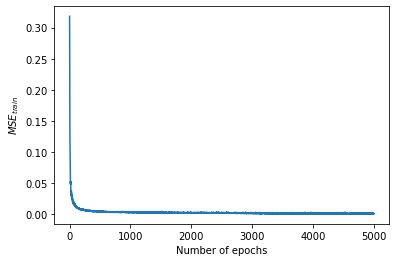

In [33]:
plt.plot(history.history['loss'])
plt.xlabel('Number of epochs')
plt.ylabel('$MSE_{train}$')

In [19]:
Y_test_pred = NN_model.predict(X_test)

In [20]:
Y_test.shape

(12, 5)

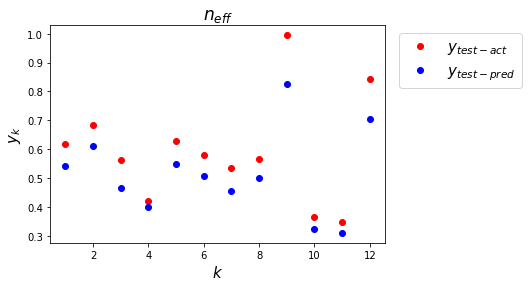

In [21]:
idx = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(idx,Y_test[:,0],'ro',label = '$y_{test-act}$')
plt.plot(idx,Y_test_pred[:,0],'bo',label = '$y_{test-pred}$')
plt.xlabel('$k$',fontsize = 15)
plt.ylabel('$y_k$',fontsize = 15)
plt.title('$n_{eff}$', fontsize = 17)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize = 15)
plt.show()

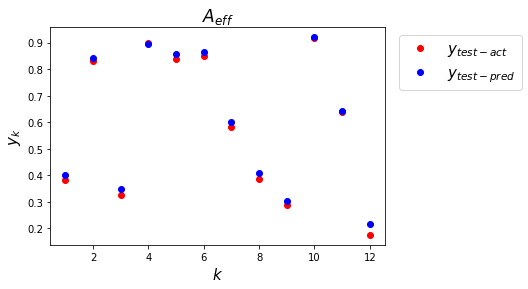

In [22]:
idx = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(idx,Y_test[:,1],'ro',label = '$y_{test-act}$')
plt.plot(idx,Y_test_pred[:,1],'bo',label = '$y_{test-pred}$')
plt.xlabel('$k$',fontsize = 15)
plt.ylabel('$y_k$',fontsize = 15)
plt.title('$A_{eff}$', fontsize = 17)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize = 15)
plt.show()

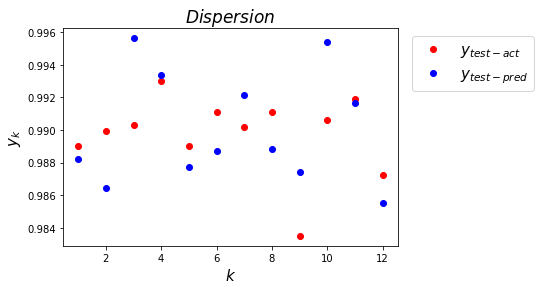

In [23]:
plt.plot(idx,Y_test[:,2],'ro',label = '$y_{test-act}$')
plt.plot(idx,Y_test_pred[:,2],'bo',label = '$y_{test-pred}$')
plt.xlabel('$k$',fontsize = 15)
plt.ylabel('$y_k$',fontsize = 15)
plt.title('$Dispersion$', fontsize = 17)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize = 15)
plt.show()

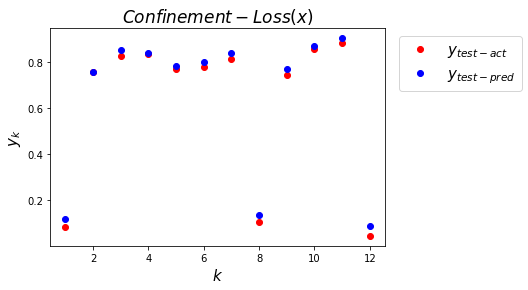

In [24]:
plt.plot(idx,Y_test[:,3],'ro',label = '$y_{test-act}$')
plt.plot(idx,Y_test_pred[:,3],'bo',label = '$y_{test-pred}$')
plt.xlabel('$k$',fontsize = 15)
plt.ylabel('$y_k$',fontsize = 15)
plt.title('$Confinement-Loss(x) $', fontsize = 17)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize = 15)
plt.show()

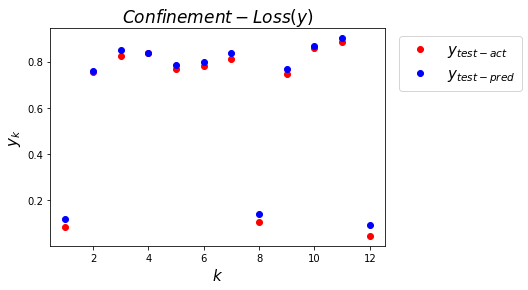

In [25]:
plt.plot(idx,Y_test[:,4],'ro',label = '$y_{test-act}$')
plt.plot(idx,Y_test_pred[:,4],'bo',label = '$y_{test-pred}$')
plt.xlabel('$k$',fontsize = 15)
plt.ylabel('$y_k$',fontsize = 15)
plt.title('$Confinement-Loss(y) $', fontsize = 17)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize = 15)
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
n_eff_mse = mean_squared_error(Y_test[:,0],Y_test_pred[:,0])
print("Test Set MSE for n_eff", n_eff_mse)

Test Set MSE for n_eff 0.007758487687885232


In [28]:
A_eff_mse = mean_squared_error(Y_test[:,1],Y_test_pred[:,1])
print("Test Set MSE for A_eff", A_eff_mse)

Test Set MSE for A_eff 0.00035594312755683294


In [29]:
D_mse = mean_squared_error(Y_test[:,2],Y_test_pred[:,2])
print("Test Set MSE for D", D_mse)

Test Set MSE for D 8.266759201614536e-06


In [30]:
cf_x_mse = mean_squared_error(Y_test[:,3],Y_test_pred[:,3])
print("Test Set MSE for D", cf_x_mse)

Test Set MSE for D 0.0005924180326240569


In [31]:
cf_y_mse = mean_squared_error(Y_test[:,4],Y_test_pred[:,4])
print("Test Set MSE for D", cf_y_mse)

Test Set MSE for D 0.0006363691726614684
